# CAPM

## 概要

**CAPM** （ **資本資産価格モデル** ：capital asset pricing model）は、市場均衡価格における個別銘柄の期待リターンと、市場に広く分散投資した「市場ポートフォリオ」の関係性を表したモデル。


### モデル

均衡で（期待効用最大化を解いた下で）危険資産の期待リターンは以下のように決まる

$$
\boldsymbol{\mu}
- \mu_0 \boldsymbol{1}
= \boldsymbol{\beta}
(\mu_\mathcal{M} - \mu_0)
$$

ここで$\boldsymbol{\beta}$を**ベータリスク**または**ベータ**とよび、$\mu_\mathcal{M}$は市場ポートフォリオの期待リターンである

このような均衡における個別銘柄の期待リターンとベータの関係はとよばれる。

### 含意

CAPMの含意は以下の2つ

1. **市場ポートフォリオは効率的である**
    - → 市場に広く分散投資するインデックス投資が効率的
2. **均衡で個別銘柄の期待リターンがすべて市場ポートフォリオに比例する形で決まる**
    - 個別銘柄への投資は市場ポートフォリオより効率的にはならない

### 限界

- CAPMは強い仮定を置いて市場のモデルを簡略化している
- CAPMのみでは説明できない事象があり、3 Factor modelや5 Factor modelなど別のファクターを入れたモデルへと派生していった

## 期待効用最大化

与えられた期待リターンのもとでボラティリティを最小化するポートフォリオは効率的フロンティア上のポートフォリオを選択すればよい。
効率的フロンティア上のどの点を選ぶのかは投資家の選好によって決まるが、なぜその点が選ばれるのかを考えたい。


### 効用関数

投資家がポートフォリオのリターン$R_P$から得る満足度を**効用**（utility）といい、その関数（効用関数）を$U(R_P)$で表す。

効用関数には代表的なものだけでもいくつかの種類がある。

**指数効用**

$$
U(R_P) = 1 - e^{-\gamma_e R_P}
$$

ここで$\gamma_e > 0$は定数で、**絶対的リスク回避度**（absolute risk aversion）と言われる。

**べき効用**

$$
U(R_P) = \frac{(1 + R_P)^{1-\gamma_p} - 1}
{1 - \gamma_p}
$$

$\gamma_p$は定数で、**相対的リスク回避度**（relative risk aversion）と言われる。$\gamma_p$が1に近づくとき、効用関数は対数型

$$
U(R_p) = \log (1 + R_P)
$$

になることが知られている。

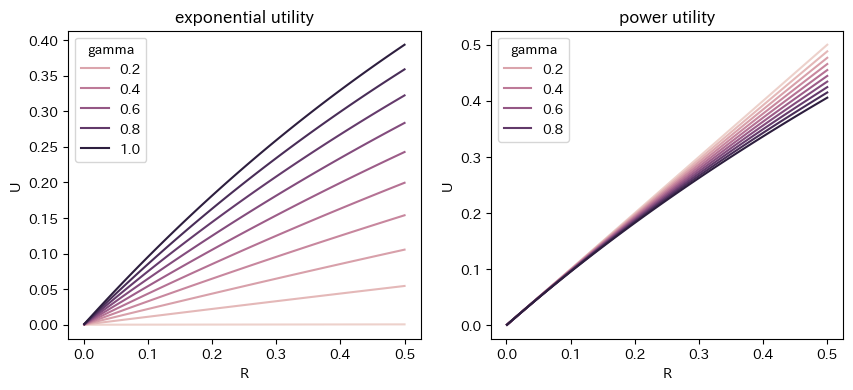

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib


def exp_utility(R, gamma):
    return 1 - np.exp( - gamma * R )

rows = []
for gamma in np.linspace(0.001, 1, 10):
    for R in np.linspace(0.001, 0.5, 100):
        row = {
            "U": exp_utility(R, gamma),
            "R": R,
            "gamma": gamma
        }
        rows.append(row)
data = pd.DataFrame(rows)

fig, axes = plt.subplots(ncols=2, figsize=[10, 4])

sns.lineplot(x="R", y="U", hue="gamma", data=data, ax=axes[0])
axes[0].set(title="exponential utility")

def pow_utility(R, gamma):
    a = (1 + R)**(1 - gamma) - 1
    return a / (1 - gamma)

rows = [] 
for gamma in np.linspace(0.001, 0.999, 10):
    for R in np.linspace(0.001, 0.5, 100):
        row = {
            "U": pow_utility(R, gamma),
            "R": R,
            "gamma": gamma
        }
        rows.append(row)
data = pd.DataFrame(rows)

sns.lineplot(x="R", y="U", hue="gamma", data=data, ax=axes[1])
axes[1].set(title="power utility")
fig.show()

### 期待効用最大化問題

リターン$R_P$が確率変数なので、期待リターンでおおよその「あたり」をつける。期待効用は以下のように定義される。

$$
u(\pi_0, \boldsymbol{\pi}) = E[U(R_P)]
$$

ここで$\pi_0$は安全資産のポートフォリオ・ウェイトで、$\boldsymbol{\pi}$は危険資産のポートフォリオ・ウェイトである。

$$
R_P = \pi_0 \mu_0 + \boldsymbol{\pi}^\top \boldsymbol{R}
$$

であるため、ポートフォリオ・リターンはポートフォリオ・ウェイトによって決まるため、ウェイトを引数としている。

期待効用の最大化が投資家の目標となる。

$$
\max_{\pi_0, \boldsymbol{\pi}} u(\pi_0, \boldsymbol{\pi})
$$

ただし、ポートフォリオ・ウェイトは$\pi_0 + \boldsymbol{\pi}^\top \boldsymbol{1} = 1$の制約を満たさなければならない。



#### 近似手法

Markowitz(2014)によると、期待効用最大化問題を直接解く代わりに、以下の期待効用の最大化を行うことで近似解が得られる

$$
u_q(\pi_0, \boldsymbol{\pi}) :=
\mu_P - \frac{1}{2} \gamma
(\sigma^2_P + \mu_P^2)
$$

ここで$\gamma > 0$は定数。

先述の効用関数は次のように近似できる

|          | 元の効用関数                                               | 近似                                                      |
| -------- | ---------------------------------------------------------- | --------------------------------------------------------- |
| 指数効用 | $U(R_P) = 1 - e^{-\gamma_e R_P}$                           | $\gamma_e(\mu_P-\frac{1}{2}\gamma_e(\sigma^2_P+\mu^2_P))$ |
| べき効用 | $U(R_P) = \frac{(1 + R_P)^{1-\gamma_p} - 1}{1 - \gamma_p}$ | $\mu_P-\frac{1}{2}\gamma_p(\sigma^2_P+\mu^2_P)$           |
| 対数効用 | $U(R_p) = \log (1 + R_P)$                                  | $\mu_P-\frac{1}{2}(\sigma^2_P+\mu^2_P)$                   |



この近似のメリットは効率的フロンティア上のどの点を選択することが期待効用最大化になるのかがはっきりわかること。

これと似た期待効用に **平均分散型の期待効用関数** がある

$$
u(\pi_0, \boldsymbol{\pi}) = \mu_P - \frac{1}{2} \gamma \sigma^2_P
$$

これは期待リターン高いほど効用が多くなり、ボラティリティが高いほど効用が減るので直感的である。リスク回避的な投資家ほど$\gamma$が大きくなると考えられる。

## 無差別曲線

同じ期待効用をもたらす期待リターンとボラティリティの組み合わせで描かれた曲線を無差別曲線と呼ぶ。


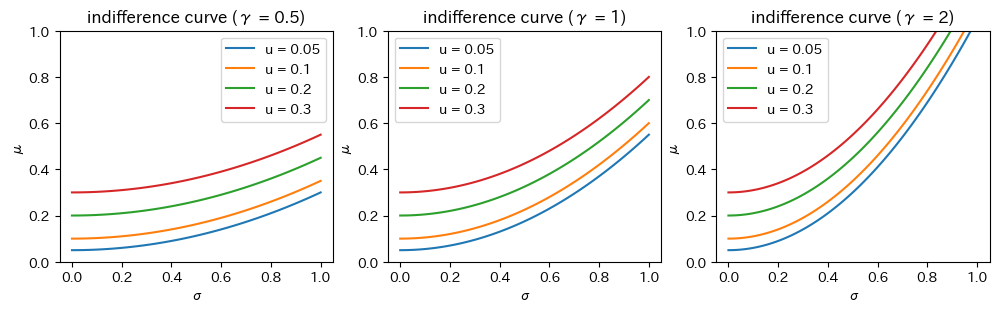

In [2]:
def indifference_curve(utility, sigma, gamma):
    mu = utility + (1 / 2) * gamma * sigma**2
    return mu

sigma_range = np.linspace(0, 1, 100)

fig, axes = plt.subplots(ncols=3, figsize=[12, 3])
for i, gamma in enumerate([0.5, 1, 2]):
    for utility in [0.05, 0.1, 0.2, 0.3]:
        mu_ = [indifference_curve(utility=utility, sigma=sigma, gamma=gamma) for sigma in sigma_range]
        axes[i].plot(sigma_range, mu_, label=f"u = {utility}")
    axes[i].legend()
    axes[i].set(title=f"indifference curve (γ = {gamma})", xlabel="σ", ylabel="μ", ylim=[0, 1])
fig.show()


実現可能領域内で最も高い効用をもたらす期待リターンとボラティリティのポートフォリオが期待効用最大化問題の解である。

期待効用を最大化する期待リターンとボラティリティは

$$
(\sigma_P^{***}, \mu_P^{***})
= \left(
\frac{\kappa}{\gamma},
\mu_0 + \frac{\kappa^2}{\gamma}
\right)
$$

である（$\kappa$はシャープ・レシオ）。

また、平均分散型の期待効用を最大化する安全資産と危険資産のポートフォリオ・ウェイトはそれぞれ

$$
\begin{align}
\pi_0^{***}
&= 1 - \frac{1}{\gamma}
\boldsymbol{1}^\top \Sigma^{-1} (\boldsymbol{\mu} - \mu_0 \boldsymbol{1})
\\
\boldsymbol{\pi}^{***}
&= \frac{1}{\gamma}
\boldsymbol{1}^\top \Sigma^{-1} (\boldsymbol{\mu} - \mu_0 \boldsymbol{1})
\end{align}
$$

で、やはり$\gamma$が大きいほど危険資産へのウェイトが減る。


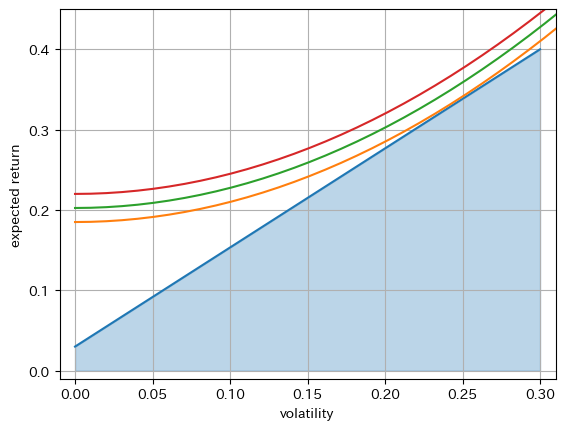

In [3]:
import itertools

# safe asset
mu0, sigma0 = (0.03, 0.0)
# stock
mu1, sigma1 = (0.4, 0.3)

mu = np.array([mu0, mu1])
sigma = np.array([sigma0, sigma1])

def Sigma(rho):
    """共分散行列。ρ_{2,1} = ρ_{1,2}の想定"""
    return np.array([
        [sigma0**2, sigma0 * sigma1 * rho],
        [sigma0 * sigma1 * rho, sigma1**2],
    ])

mu_Ps = np.array([])
sigma_Ps = np.array([])
rhos = np.array([])

# ポートフォリオ・ウェイトの組み合わせ
pi1 = np.linspace(0, 1, 51)
pi2 = 1 - pi1
pi_range = np.array([pi1, pi2])

# 相関係数
rho_range = [-0.95, 1]

# 変数を変えていったときのポートフォリオのボラティリティ
for pi, rho in itertools.product(pi_range.T, rho_range):
    mu_P = pi.T @ mu  # ポートフォリオの期待リターン
    sigma_P = np.sqrt(pi.T @ Sigma(rho) @ pi)  # ポートフォリオのボラティリティ
    mu_Ps = np.append(mu_Ps, mu_P)
    sigma_Ps = np.append(sigma_Ps, sigma_P)
    rhos = np.append(rhos, sigma_P)

# plot
fig, ax = plt.subplots()
ax.plot(sigma_Ps, mu_Ps)
ax.fill_between(sigma_Ps, mu_Ps, where=(mu_Ps > 0), color='C0', alpha=0.3)
ax.set(xlabel="volatility", ylabel="expected return", xlim=[-0.01, 0.31], ylim=[-0.01, 0.45])
ax.grid(True)


sigma_range = np.linspace(0, 1, 100)
for utility in np.linspace(0.185, 0.22, 3):
    mu_ = [indifference_curve(utility=utility, sigma=sigma, gamma=5) for sigma in sigma_range]
    ax.plot(sigma_range, mu_, label=f"u = {utility}")

fig.show()

## 市場の均衡

危険資産の平均分散フロンティアに安全資産を加えたものが直線で描かれるが、市場で取引されるすべての危険資産を含むことを強調した表現としてこの直線を**資本市場線**（capital market line, CML）という。

また、資本市場線における接点ポートフォリオを**市場ポートフォリオ**（market portfolio）という。

また、ここで描かれる無差別曲線は**代表的投資家**（representative investor）とよばれる、市場に参加するすべての投資家の富を合算した仮想的な存在である。

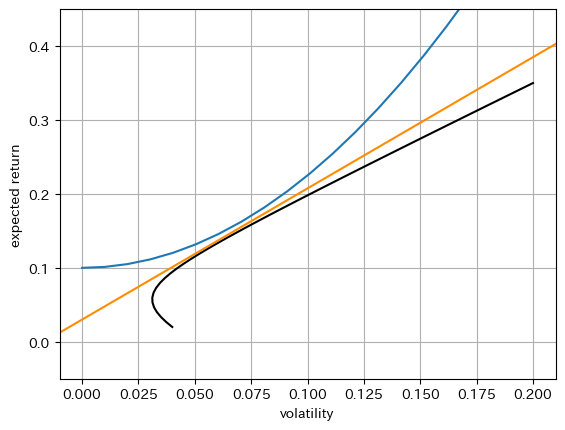

In [4]:
import itertools

# safe asset
mu0, sigma0 = (0.03, 0.00)
# stocks
mu1, sigma1 = (0.02, 0.04)
mu2, sigma2 = (0.35, 0.2)

def Sigma(rho):
    """共分散行列。ρ_{2,1} = ρ_{1,2}の想定"""
    return np.array([
        [sigma1**2, sigma1 * sigma2 * rho],
        [sigma1 * sigma2 * rho, sigma2**2],
    ])

mu = np.array([mu1, mu2])
sigma = np.array([sigma1, sigma2])

mu_Ps = np.array([])
sigma_Ps = np.array([])
rho = -0.5  # 相関係数

# ポートフォリオ・ウェイトの組み合わせ
pi1 = np.linspace(0, 1, 51)
pi2 = 1 - pi1
pi_range = np.array([pi1, pi2])

for pi in pi_range.T:
    mu_P = pi.T @ mu  # ポートフォリオの期待リターン
    sigma_P = np.sqrt(pi.T @ Sigma(rho) @ pi)  # ポートフォリオのボラティリティ
    mu_Ps = np.append(mu_Ps, mu_P)
    sigma_Ps = np.append(sigma_Ps, sigma_P)

# plot
fig, ax = plt.subplots()

# 平均分散フロンティア
ax.plot(sigma_Ps, mu_Ps, color="black")
ax.set(xlabel="volatility", ylabel="expected return", xlim=[-0.01, 0.21], ylim=[-0.05, 0.45])
ax.grid(True)

# 無差別曲線
sigma_range = np.linspace(0, 1, 100)
mu_ = [indifference_curve(utility=0.1, sigma=sigma, gamma=25) for sigma in sigma_range]
ax.plot(sigma_range, mu_, label=f"u = {utility}")

# 資本市場線
ax.axline((sigma0, mu0), (sigma2, mu2 * 1.1), color="darkorange")

fig.show()

## CAPM

代表的投資家の期待効用が平均分散型で与えられることを仮定する。

$$
u_R(\pi_0, \boldsymbol{\pi}) 
= \mu_R - \frac{1}{2} \gamma_R \sigma^2_R
$$

ただし、$\gamma_R > 0 $は定数。このとき均衡で（期待効用最大化を解いた下で）危険資産の期待リターンは以下のように決まることが知られている

$$
\boldsymbol{\mu}
- \mu_0 \boldsymbol{1}
= \boldsymbol{\beta}
(\mu_\mathcal{M} - \mu_0)
$$

ここで$\boldsymbol{\beta}$を**ベータリスク**または**ベータ**とよび、

$$
\boldsymbol{\beta}
= (\sigma_{1,\mathcal{M}}/\sigma^2_\mathcal{M},
\cdots,
\sigma_{M,\mathcal{M}}/\sigma^2_\mathcal{M})
$$

で定義する。$\mu_\mathcal{M}$は市場ポートフォリオの期待リターン、$\sigma_{m,\mathcal{M}}$は危険資産と市場ポートフォリオの共分散である。

このような均衡における個別銘柄の期待リターンとベータの関係は**CAPM**（**資本資産価格モデル**：capital asset pricing model）とよばれる。

CAPMの含意は「均衡で個別銘柄の期待リターンがすべて市場ポートフォリオに比例する形で決まる」こと。

#### 個別銘柄は市場ポートフォリオに比例する

経済学的な解釈としては、ある銘柄$S_m$の期待リターン

$$
\mu_m = \mu_0 + \beta_m (\mu_{\mathcal{M}} - \mu_0)
$$

を書き換えれば

$$
\mu_m = \beta_m \mu_{\mathcal{M}} +(1 - \beta_m) \mu_0
$$

となり、$\mu_0$と$\mu_{\mathcal{M}}$を$1 - \beta_m: \beta_m$の比で按分した格好になっている。

$\beta_m$が1を超えて大きくなると期待リターンも大きくなるが、その分リスクも大きくなる。つまり**ベータは個別銘柄のリスクを表す**。

また、

$$
\boldsymbol{\mu}
- \mu_0 \boldsymbol{1}
= \boldsymbol{\beta}
(\mu_\mathcal{M} - \mu_0)
$$

は**個別銘柄のリスク・プレミアム（$\mu_m - \mu_0$）が市場ポートフォリオのリスク・プレミアム（$\mu_{\mathcal{M}} - \mu_0$）に比例する**とも解釈できる。

#### 個別銘柄は市場ポートフォリオを上回らない

市場ポートフォリオのシャープ・レシオ

$$
\kappa_{\mathcal{M}}
= \frac{\mu_\mathcal{M} - \mu_0}
{\sigma_{\mathcal{M}}}
$$

を使うと

$$
\begin{align}
\boldsymbol{\beta}
(\mu_\mathcal{M} - \mu_0)
&=
\begin{pmatrix}
\frac{\sigma_{1,\mathcal{M}}}{\sigma^2_\mathcal{M}}\\
\vdots\\
\frac{\sigma_{M,\mathcal{M}}}{\sigma^2_\mathcal{M}}\\
\end{pmatrix}
(\mu_\mathcal{M} - \mu_0)
\\
&=
\begin{pmatrix}
\frac{\sigma_{1,\mathcal{M}}}{\sigma_\mathcal{M}}
\kappa_{\mathcal{M}}\\
\vdots\\
\frac{\sigma_{M,\mathcal{M}}}{\sigma_\mathcal{M}}
\kappa_{\mathcal{M}}\\
\end{pmatrix}
\end{align}
$$

であることから、銘柄$m$の期待リターン$\mu_m$は

$$
\mu_m = \mu_0 + 
\frac{\sigma_{m,\mathcal{M}}}{\sigma_\mathcal{M}}
\kappa_{\mathcal{M}}
$$

と表すことができ、左辺に$\sigma_m/\sigma_m$を乗じると

$$
\begin{align}
\mu_m &= \mu_0 + 
\frac{\sigma_{m,\mathcal{M}} \sigma_m}
{\sigma_\mathcal{M} \sigma_m}
\kappa_{\mathcal{M}}\\
&= \mu_0 + 
\rho_{m, \mathcal{M}}
\times
\kappa_{\mathcal{M}}
\times
\sigma_m
\end{align}
$$

ここで

$$
\rho_{m, \mathcal{M}}
= \frac{\sigma_{m,\mathcal{M}}}
{\sigma_m \sigma_\mathcal{M}}
$$

である。

さらに

$$
\frac{\mu_m - \mu_0}{\sigma_m}
= \rho_{m, \mathcal{M}}
\times
\kappa_{\mathcal{M}}
$$

と整理できる。相関係数$\rho_{m, \mathcal{M}}$は最大1であるため、この式は**個別銘柄のシャープ・レシオは市場ポートフォリオのシャープ・レシオを超えることは不可能である**ことを意味する。

## 線形回帰との関係性

CAPMの主張の一つは「個別銘柄のリスク・プレミアムは市場ポートフォリオのリスク・プレミアムに比例する」というものだ。しかし、リスク・プレミアムは直接観察できず、観察できるのは株価などの価格なので、価格をリターンに加工し、リターンから安全資産の利回りを差し引いて推定する必要がある。

さらに、売値と買値に乖離がある場合もある（その場合は仲値という買値と売値の中間の価格をとりあえずの価格とすることが多い）

観測できる価格は確率変数の実現値であると考え、その背後にある規則性を観察したいと考える。
例えば市場ポートフォリオと個別銘柄とのリスク・プレミアムの関係をデータから探りたい場合は

$$
\tilde{R}_m = f(\tilde{R}_\mathcal{M}) + \epsilon_m
$$

のようにして$f(\cdot)$を推定する。
なお、$\tilde{R}_m = R_m - \mu_0, \tilde{R}_\mathcal{M} = R_\mathcal{M} - \mu_0$であり$\epsilon_m$は観測の誤差を表す。誤差は平均がゼロで$\tilde{R}_\mathcal{M}$とは無相関な確率変数とする。

もしデータから$f(\cdot) = \beta_m x$という関係が特定できたならば、上の式は

$$
\tilde{R}_m = \beta_m \tilde{R}_\mathcal{M} + \epsilon_m
$$

となり、両辺の期待値はCAPMそのものになる。分散は

$$
\sigma^2_m = \beta^2_m \sigma^2_{\mathcal{M}} + \sigma^2_{\epsilon_m}
$$

で、**危険資産$S_m$のリスクは市場ポートフォリオに起因するリスクとそれ以外の（$S_m$に固有の）リスクに分解できる**。そこで$\beta_m \sigma_\mathcal{M}$を**システマティック・リスク**（systematic risk）、$\sigma_{\epsilon_m}$を**固有リスク**（idiosyncratic risk）と呼ぶ。

### アルファ

なお、線形回帰で推定した際、

$$
\tilde{R}_m = \hat{\alpha}_m + \hat{\beta}_m \tilde{R}_\mathcal{M} + \epsilon_m
$$

標本平均・標本分散・標本共分散はそれぞれの真値をよく近似しているはずで$\hat{\beta}_m \approx \beta_m$なので、切片項$\hat{\alpha}_m$がゼロならば上の式はCAPMの近似となる。しかし、時折$\hat{\alpha}_m$はゼロにならないことがある。

ゼロでない$\hat{\alpha}_m$を組み込んだポートフォリオはそれ自体がアルファをもつことになる。正のアルファはポートフォリオのパフォーマンスを測る尺度にもなりうる。

このアルファをしばしば**ジェンセンのアルファ**（Jensen's alpha）という。

### データによる推定

In [5]:
# !pip install pandas-datareader
# # 書籍の方法だが、うまくいかなかった
# import pandas_datareader as pdr
# import yfinance as yf

# yf.pdr_override()  # pandas-datareader側でデータを取得できるようにする

# start = "2016-01-01"

# symbol_0 = "^TNX" # 米国10年もの国債
# df_0 = pdr.get_data_yahoo(symbol_0, start=start, end="2021-05-01")

# symbol_M = "^GSPC" # S&P500
# df_M = pdr.get_data_yahoo(symbol_M, start=start)

# symbol_m = "MCD" # マクドナルド
# df_m = pdr.get_data_yahoo(symbol_m, start=start)


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

start = "2016-01-01"
symbol_0 = "^TNX" # 米国10年もの国債
symbol_M = "^GSPC" # S&P500
symbol_m = "MCD" # マクドナルド

symbols = [symbol_0, symbol_M, symbol_m]
df_price = yf.download(symbols, start=start)["Adj Close"]
df_price

[*********************100%***********************]  3 of 3 completed


,MCD,^GSPC,^TNX
Date,,,
2016-01-04,98.793457,2012.660034,2.245
2016-01-05,100.154602,2016.709961,2.248
2016-01-06,99.482437,1990.260010,2.177
2016-01-07,97.180214,1943.089966,2.153
2016-01-08,97.028969,1922.030029,2.130
...,...,...,...
2023-02-13,266.200012,4137.290039,3.717
2023-02-14,266.609985,4136.129883,3.761
2023-02-15,266.559998,4147.600098,3.809


In [7]:
# 日次リターンにする
df_rate = df_price[[symbol_M, symbol_m]].pct_change(1)

# 金利を足す
df_rate[symbol_0] = df_price[symbol_0]

df_rate

,^GSPC,MCD,^TNX
Date,,,
2016-01-04,NaN,NaN,2.245
2016-01-05,0.002012,0.013778,2.248
2016-01-06,-0.013115,-0.006711,2.177
2016-01-07,-0.023700,-0.023142,2.153
2016-01-08,-0.010838,-0.001556,2.130
...,...,...,...
2023-02-13,0.011449,0.014404,3.717
2023-02-14,-0.000280,0.001540,3.761
2023-02-15,0.002773,-0.000187,3.809


In [8]:
# リスク・プレミアム
df_rp = pd.DataFrame({
    # 金利はパーセント表示の年率なので、0.01をかけて日割りしておく
    symbol_M: df_rate[symbol_M] - df_rate[symbol_0] * 0.01 / 255,
    symbol_m: df_rate[symbol_m] - df_rate[symbol_0] * 0.01 / 255,
}).dropna()
df_rp

,^GSPC,MCD
Date,,
2016-01-05,0.001924,0.013690
2016-01-06,-0.013201,-0.006797
2016-01-07,-0.023785,-0.023226
2016-01-08,-0.010922,-0.001640
2016-01-11,0.000769,0.010393
...,...,...
2023-02-13,0.011303,0.014259
2023-02-14,-0.000428,0.001393
2023-02-15,0.002624,-0.000337


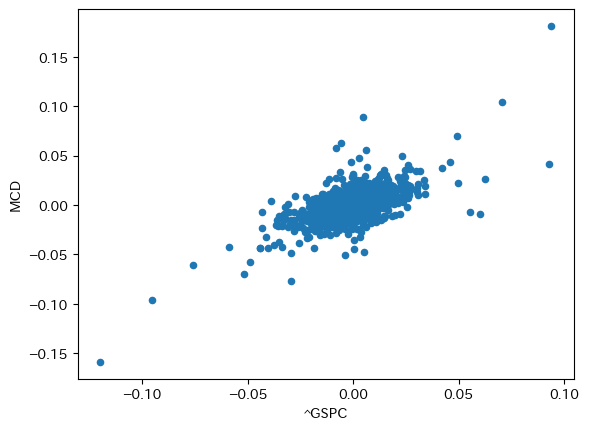

In [9]:
df_rp.plot.scatter(x=symbol_M, y=symbol_m)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

# shuffle=Falseにすることで新しいものだけをtestにできる
df_train, df_val = train_test_split(df_rp, test_size=0.2, shuffle=False)

X_train = df_train[[symbol_M]]
X_val = df_val[[symbol_M]]

y_train = df_train[symbol_m]
y_val = df_val[symbol_m]

推定されたαとβは以下のようになった。

In [11]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
print(f"α={reg.intercept_:.3g}, β={reg.coef_[0]:.3g}")

α=0.000193, β=0.776


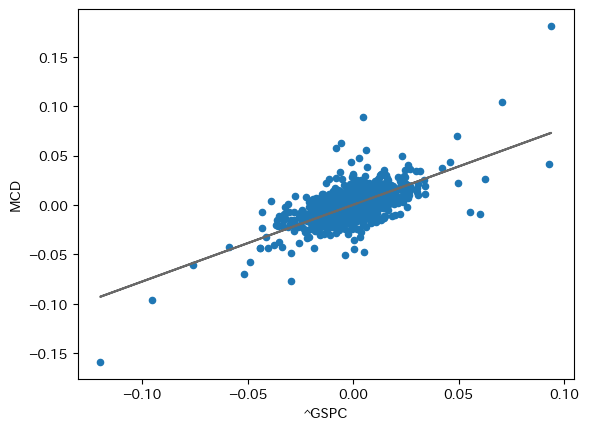

In [12]:
fig, ax = plt.subplots()
df_rp.plot.scatter(x=symbol_M, y=symbol_m, ax=ax)
ax.plot(X_train, reg.predict(X_train), color="dimgray")
fig.show()

なおHold-out誤差は次のようになった。

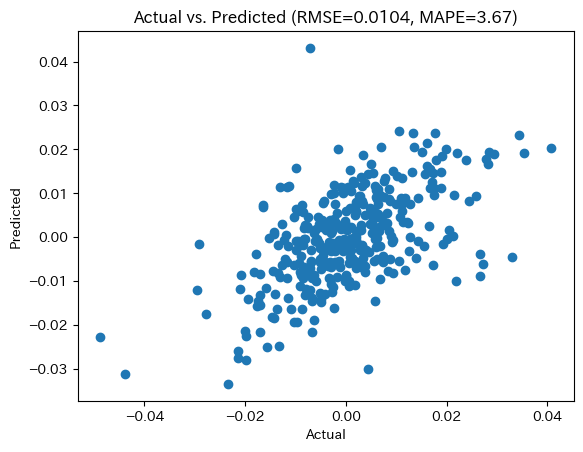

In [13]:
# 予測誤差
y_pred = reg.predict(X_val)

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
rmse = mean_squared_error(y_val, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_val, y_pred)

fig, ax = plt.subplots()
ax.scatter(y_val, y_pred)
ax.set(xlabel="Actual", ylabel="Predicted", title=f"Actual vs. Predicted (RMSE={rmse:.3g}, MAPE={mape:.3g})")
fig.show()

### 日本株の場合

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

start = "2016-01-01"
symbol_M = "^N225" # 日経平均
symbol_m = "9983.T" # ファーストリテイリング

symbols = [symbol_M, symbol_m]
df_price = yf.download(symbols, start=start)["Adj Close"]


#日本国債の金利（年率）を財務省から取得
url = "https://www.mof.go.jp/english/policy/jgbs/reference/interest_rate/historical/jgbcme_all.csv"
df_bond_yield = pd.read_csv(url, header=1, index_col="Date", na_values="-", parse_dates=True)

symbol_0 = '10Y'
df_price[symbol_0] = df_bond_yield[symbol_0].copy()


# 日次リターンにする
df_rate = df_price[[symbol_M, symbol_m]].pct_change(1)
# 金利を足す
df_rate[symbol_0] = df_price[symbol_0]

# リスク・プレミアム
df_rp = pd.DataFrame({
    # 金利はパーセント表示の年率なので、0.01をかけて日割りしておく
    symbol_M: df_rate[symbol_M] - df_rate[symbol_0] * 0.01 / 255,
    symbol_m: df_rate[symbol_m] - df_rate[symbol_0] * 0.01 / 255,
}).dropna()
df_rp

[*********************100%***********************]  2 of 2 completed


,^N225,9983.T
Date,,
2016-01-05,-0.004182,-0.005422
2016-01-06,-0.009952,-0.006441
2016-01-07,-0.023316,-0.027891
2016-01-08,-0.003914,-0.023312
2016-01-12,-0.027074,-0.013381
...,...,...
2023-01-25,0.003492,0.001664
2023-01-26,-0.001197,-0.001439
2023-01-27,0.000705,0.015369


<AxesSubplot:xlabel='^N225', ylabel='9983.T'>

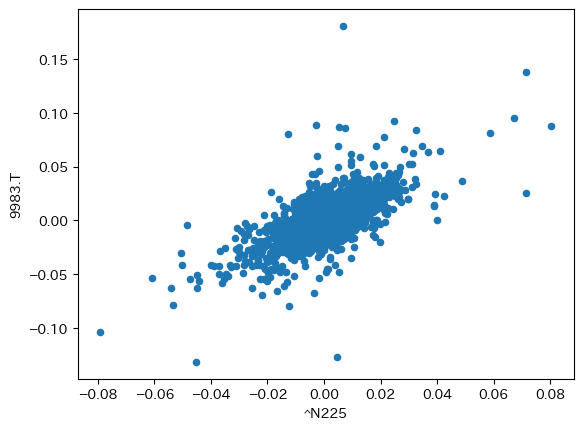

In [41]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
print(f"α={reg.intercept_:.3g}, β={reg.coef_[0]:.3g}")

df_rp.plot.scatter("^N225", "9983.T")

## CAPMのまとめ

### 仮定

1. 全ての投資家は平均分散分析によりポートフォリオを選択する。
2. 全ての投資家は全ての金融資産の収益率の平均と分散について同一の予想を持つ。
3. 金融市場が完全市場である。
4. 無リスク資産が存在する。

### 含意

#### 1. マーケット・ポートフォリオは効率的

:::{admonition} オリジナルのCAPM
安全資産が存在するとき、市場の均衡状態においてマーケット・ポートフォリオは接点ポートフォリオと一致する。したがって、マーケット・ポートフォリオは効率的ポートフォリオである。
:::

より一般化したものもある

:::{admonition} **ゼロベータCAPM**（zero-beta CAPM）
安全資産の有無にかかわらず、市場の均衡状態においてマーケット・ポートフォリオは効率的ポートフォリオである（[Black et al. 1972](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=908569)）
:::

#### 2. 個別銘柄はマーケット・ポートフォリオに比例する

$$
\mu_m - \mu_0 = \beta_m ( \mu_{\mathcal{M}} - \mu_0)
$$

## CAPMの限界

CAPMだけでは説明できないアノマリーの存在が指摘され、市場ポートフォリオのリスク・プレミアム以外の要因（小型株効果やバリュー株効果）を含めた3-factor modelなどが提案されていった

## 参考

- 吉川 大介（2022）『データ駆動型ファイナンス』、共立出版。
- 小林 孝雄（2009）『新・証券投資論 1 理論篇』、日本経済新聞出版社